In [1]:
import yaml
import anndata
import scanpy as sc
from scipy.sparse import csr_matrix
from ALLCools.clustering import significant_pc_test, log_scale, balanced_pca

## Parameters

In [2]:
with open('config/05b.yaml', 'r') as f:
    config = yaml.safe_load(f)
    locals().update(config)
    print('Notebook configs:')
    for _k, _v in config.items():
        print(f'{_k} = {_v}')

Notebook configs:
adata_path = mCG.CEF.h5ad
max_cell_prop = 0.1
n_components = auto
p_cutoff = 0.1
pre_cluster_name = leiden


In [3]:
# Parameters
adata_path = "mCG.CEF.h5ad"
max_cell_prop = 0.1
n_components = "auto"
p_cutoff = 0.1
pre_cluster_name = "leiden"


## Load Data

In [4]:
adata = anndata.read_h5ad(adata_path)

## Scale

In [5]:
scaler = log_scale(adata)

## PCA

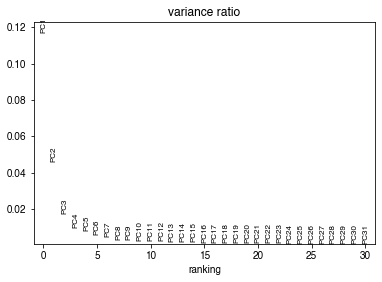

50 components passed P cutoff of 0.1.
Changing adata.obsm['X_pca'] from shape (12291, 100) to (12291, 50)


In [6]:
if adata.shape[1] > 3:
    balanced_pca(adata, groups=pre_cluster_name, max_cell_prop=max_cell_prop)
    sc.pl.pca_variance_ratio(adata)
    ch_n_components = significant_pc_test(adata, p_cutoff=p_cutoff)
else:
    adata.obsm['X_pca'] = adata.X
    import numpy as np
    mat = np.zeros(shape=(adata.shape[1], adata.shape[1]))
    np.fill_diagonal(mat, 1)
    adata.varm['PCs'] = mat

## Save

In [7]:
# empty X to save space and memory, following analysis won't need X
adata.X = csr_matrix(adata.shape)
adata.write_h5ad('mcg_adata.with_coords.h5ad')

In [8]:
from ALLCools.clustering import ReproduciblePCA

rpca = ReproduciblePCA(scaler=scaler, mc_type='CGN', adata=adata)
rpca.dump('mCG.ReproduciblePCA.lib')